In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [3]:
X,Y = make_circles(n_samples=500,noise=0.2,factor=0.2) #factor is 2 circle ke neech ka separation
print(X.shape,Y.shape)

(500, 2) (500,)


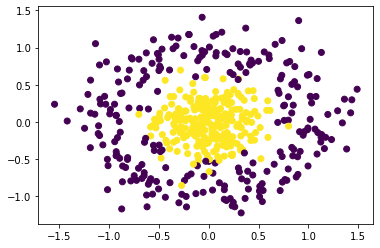

In [5]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [6]:
input_size = 2 # 2 features

#3 layer network 2 - 4H1 - 3H2 - 2 Output
layers = [4,3]
output = 2


In [10]:
#a = np.array([[10,20],[30,40]])
#print(np.sum(a,axis=0,keepdims=True)) #along the rows
#keepdims true krne se shape loose nahi ho rahi, 2d se 2d mai hi reh rahe hai

In [11]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

In [14]:
a = np.array([[20,10],[20,20]])
softmax(a)
#higher activation means higher probability

array([[9.99954602e-01, 4.53978687e-05],
       [5.00000000e-01, 5.00000000e-01]])

In [ ]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_layers,output_size):
        np.random.seed(0)
        model = {}
        
        #initialising weight matrice
        model['W1'] = np.random.randn(input_size,hidden_layers[0])
        model['b1'] = np.zeros(1,hidden_layers[0])
        
        model['W2'] = np.random.randn(hidden_layers[0],hidden_layers[1])
        model['b2'] = np.zeros((1,hidden_layers[1]))
        
        model['W3'] = np.random.randn(hidden_layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def forward(self,x):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) #tanh is a shifted version of sigmoid
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        # store the outputs of each layer in a variable for backpropagation later
        self.activation_outputs = (a1,a2,y_)
        return y_
    
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        a1,a2,y_ = self.activation_outputs
        
        #final layer
        delta3 = y_ - y
        
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)